In [1]:
import warnings

warnings.filterwarnings("ignore")
# libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# pd.options.display.max_columns=200
#pd.options.display.max_rows=200

In [2]:
# loading the dataset
cc=pd.read_csv("data_credit_card_customer_seg.csv")
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#df.dropna(subset=['Name'])

cc=cc.dropna(subset=["CREDIT_LIMIT"])

# dropping the one row of null value.

cc["MINIMUM_PAYMENTS"]=cc["MINIMUM_PAYMENTS"].fillna(0)

In [4]:
# null values
cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [5]:
cc["CREDIT_STATUS"]=np.where(cc["PURCHASES"]>cc["CREDIT_LIMIT"],"CROSSED","NOT_CROSSED")

In [6]:
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_STATUS
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,NOT_CROSSED
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,NOT_CROSSED
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,NOT_CROSSED
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,NOT_CROSSED
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,NOT_CROSSED


In [7]:
cc_nc = cc[cc['CREDIT_STATUS']=="NOT_CROSSED"].reset_index(drop=True)
cc_c = cc[cc['CREDIT_STATUS']=="CROSSED"].reset_index(drop=True)

In [8]:
cc_c.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CREDIT_STATUS
0,C10013,1516.928620,1.0,3217.99,2500.23,717.76,0.000000,1.000000,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.250000,12,CROSSED
1,C10053,1078.888565,1.0,3107.85,2221.74,886.11,0.000000,0.666667,0.583333,0.500000,0.000000,0,18,2500.0,1399.828340,1322.446601,0.000000,12,CROSSED
2,C10067,1923.886805,1.0,1887.64,0.00,1887.64,1605.949371,1.000000,0.000000,1.000000,0.083333,4,61,1850.0,3688.045998,3266.996777,0.083333,12,CROSSED
3,C10131,2392.917738,1.0,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12,CROSSED
4,C10144,19043.138560,1.0,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12,CROSSED


In [9]:
cc_c.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
CREDIT_STATUS                       0
dtype: int64

In [13]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [11]:
cc_nc["TOT_TRX"]=cc_nc["CASH_ADVANCE_TRX"]+cc_nc["PURCHASES_TRX"]
cc_nc.drop(["CASH_ADVANCE_TRX","PURCHASES_TRX"], axis=1, inplace=True)


cc_nc["TOT_TRANSACTION"]=cc_nc["PURCHASES"]+cc_nc["CASH_ADVANCE"]
cc_nc.drop(["PURCHASES","CASH_ADVANCE"], axis = 1, inplace = True)


In [12]:
cc_nc.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'CREDIT_STATUS',
       'TOT_TRX', 'TOT_TRANSACTION'],
      dtype='object')

In [12]:
cck =cc_nc[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

In [14]:
cck =cc_nc[['BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'TOT_TRX',
       'TOT_TRANSACTION']]

# instantiate
scaler=MinMaxScaler()

# fit_transform
cck_scaled = scaler.fit_transform(cck)
cck_scaled.shape

(8508, 10)

In [15]:
pca = PCA(n_components = 2) 
cck_scaled_pr = pca.fit_transform(cck_scaled) 
cck_scaled_pr = pd.DataFrame(cck_scaled_pr) 
cck_scaled_pr.columns = ['P1', 'P2'] 


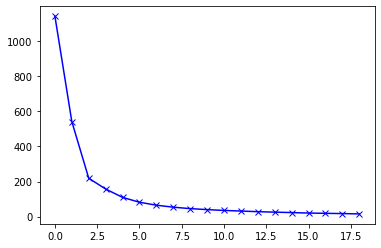

In [16]:
n_clusters=20
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(cck_scaled_pr)
    cost.append(kmean.inertia_)  
   
plt.plot(cost, 'bx-')

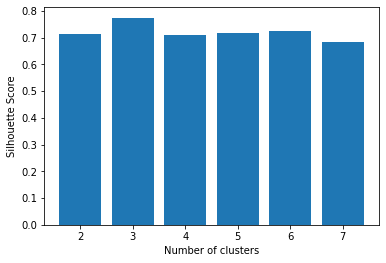

In [18]:
silhouette_scores = [] 
for n_cluster in range(2, 8):
    silhouette_scores.append(   
        silhouette_score(cck_scaled_pr, KMeans(n_clusters = n_cluster).fit_predict(cck_scaled_pr))) 
    
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()    

In [ ]:
#Applying k-Means with cluster as 2

In [19]:
db_default = KMeans(n_clusters=4, init='k-means++').fit(cck_scaled_pr) 
labels = db_default.labels_  

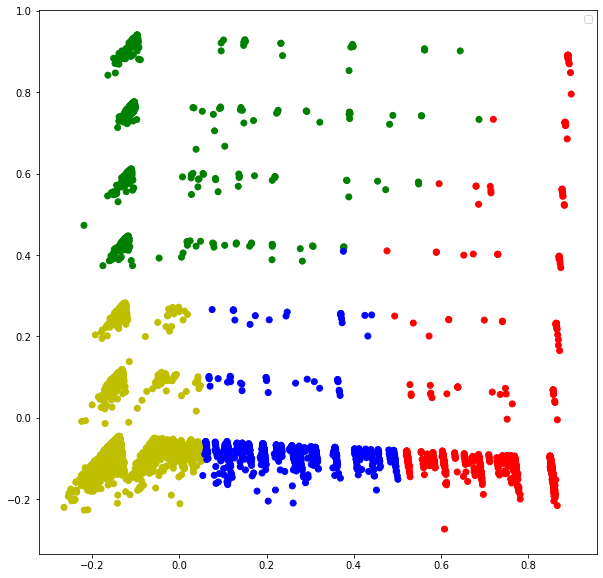

In [20]:
colours = {} 
colours[0] = 'r'
colours[1] = 'y'
colours[2] = 'g'
colours[3] = 'b'
#colours[4] = 'c'
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
#r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
#y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 

#g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(10, 10))  
plt.scatter(cck_scaled_pr['P1'], cck_scaled_pr['P2'], c = cvec) 
  
# Building the legend 
#plt.legend(('r', 'y', 'g'), ('Label 0','Label 1','Label 2')) 
#plt.legend(('r', 'y','g','b','c'), ('Label 0','Label 1','Label 2','Label 3','Label 4')) 
plt.legend(('r', 'y','g','b'), ('Label 0','Label 1','Label 2','Label 3')) 
plt.show() 

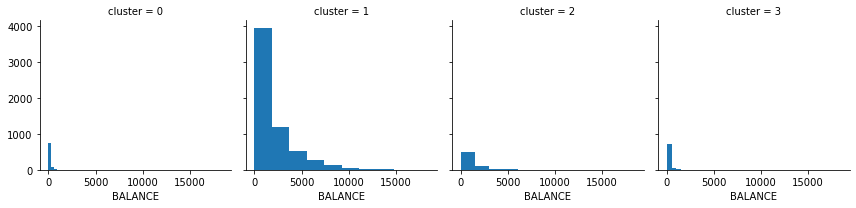

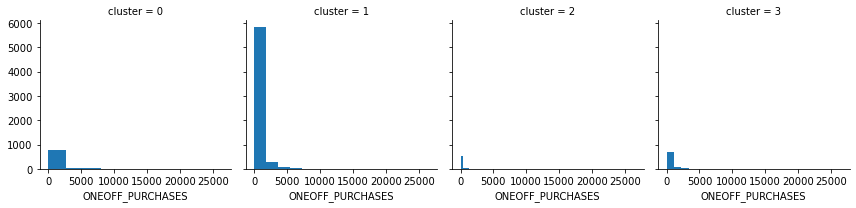

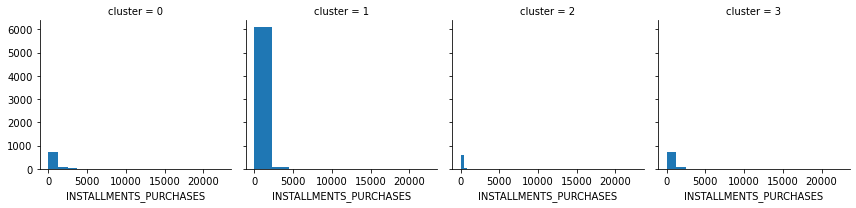

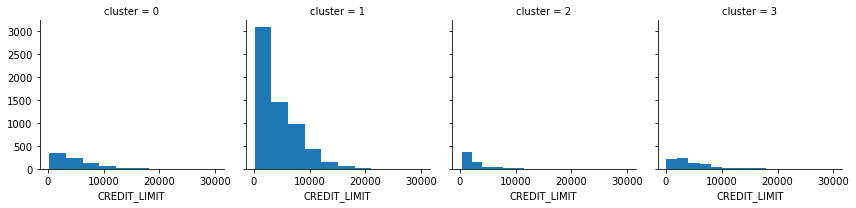

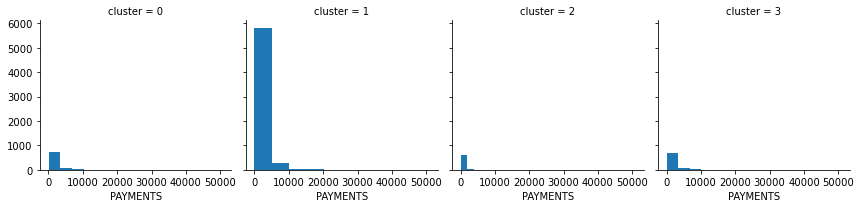

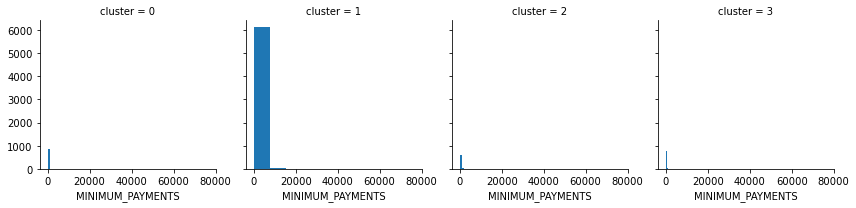

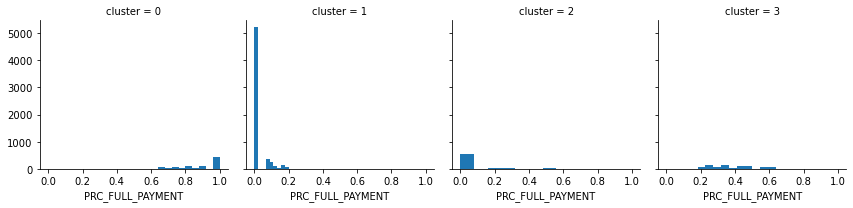

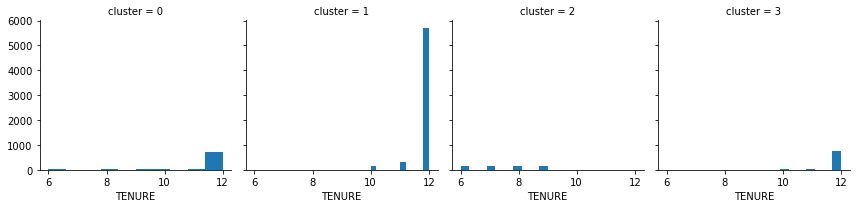

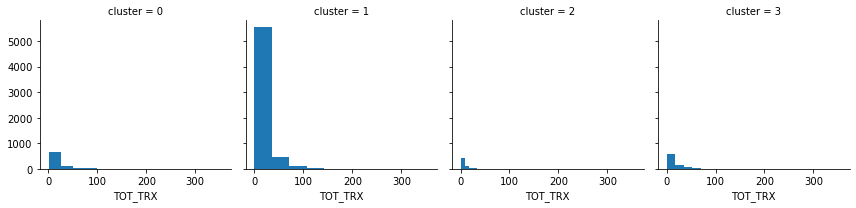

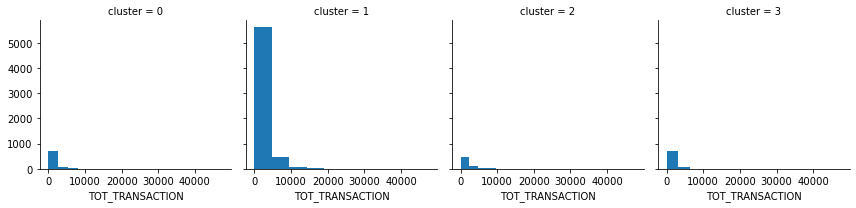

In [21]:
clusters=pd.concat([cck, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

for cols in cck:
    g = sns.FacetGrid(clusters, col = 'cluster')
    g.map(plt.hist, cols)

In [22]:
# assign the label
cck['CLUST_ID'] = labels
cck.head()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOT_TRX,TOT_TRANSACTION,CLUST_ID
0,40.900749,0.00,95.4,1000.0,201.802084,139.509787,0.000000,12,2,95.400000,1
1,3202.467416,0.00,0.0,7000.0,4103.032597,1072.340217,0.222222,12,4,6442.945483,3
2,2495.148862,773.17,0.0,7500.0,622.066742,627.284787,0.000000,12,12,773.170000,1
3,1666.670542,1499.00,0.0,7500.0,0.000000,0.000000,0.000000,12,2,1704.788017,1
4,817.714335,16.00,0.0,1200.0,678.334763,244.791237,0.000000,12,1,16.000000,1


In [23]:
cck.groupby('CLUST_ID').mean()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,TOT_TRX,TOT_TRANSACTION
CLUST_ID,,,,,,,,,,
0,146.249360,776.312924,674.004316,5364.942229,1813.935873,194.449425,0.902290,11.484211,21.590643,1564.529934
1,1983.197647,425.702252,299.794015,4586.749381,1578.630068,1012.755410,0.017796,11.896752,16.039263,1859.475428
2,1226.959598,251.211313,130.178137,2977.226463,759.756540,437.363412,0.066091,7.447328,9.532824,1978.599975
3,269.081366,509.361743,534.367553,4829.947185,2093.268643,234.186720,0.385484,11.907293,17.322621,1609.997487


Text(0.5, 0, 'SEGMENTS')

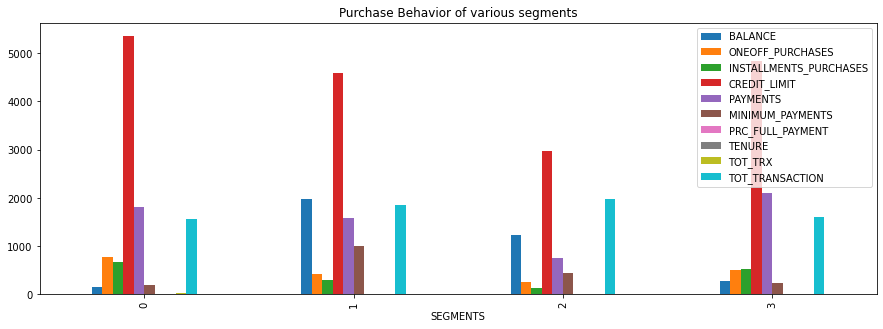

In [24]:
(cck[['BALANCE','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'TOT_TRX',
       'TOT_TRANSACTION','CLUST_ID']].groupby('CLUST_ID').mean().plot.bar(figsize=(15, 5)))
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS')